In [87]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans

In [88]:
df = pd.read_csv("data.csv")

In [89]:
vectorizer = CountVectorizer()
#Transform department data
deptColumnData = df['Dept']
deptColumnData_encoded = vectorizer.fit_transform(deptColumnData)
deptColumnData_encoded = deptColumnData_encoded.toarray()
deptColumnData_encoded = [row[0] for row in deptColumnData_encoded]
#Transfortm location
recruitmentData = df['recruitment_type']
recruitmentData_encoded = vectorizer.fit_transform(recruitmentData)
recruitmentData_encoded = recruitmentData_encoded.toarray()
recruitmentData_encoded = [row[0] for row in recruitmentData_encoded]

df = df.assign(Dept = deptColumnData_encoded)
df = df.assign(recruitment_type = recruitmentData_encoded)

In [90]:
# Extract the feature columns
X = df[['Dept', 'recruitment_type', 'job_level' ,'salary']]

In [91]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
# Fit the PCA model and transform the data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

In [93]:
# Fit the TSNE model and transform the data
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(X_reduced)



c:\users\vladislavzelenin\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\users\vladislavzelenin\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


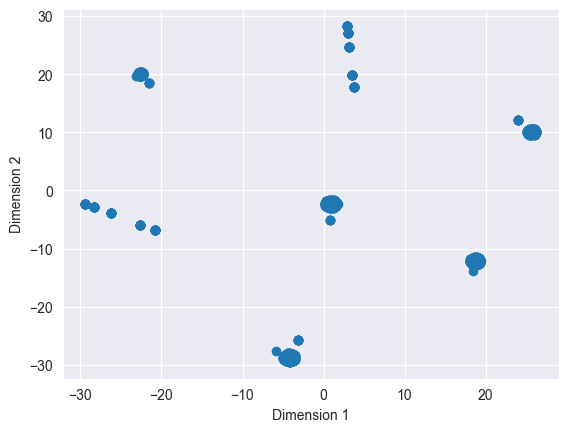

In [94]:
# Create a scatter plot of the transformed data
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

# Add axis labels
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Show the plot
plt.show()

In [95]:
#Cluster analyze

In [96]:
# Load the image and convert it to a two-dimensional array of pixels
image = Image.open('kpi.jpg')
pixels = np.array(image)

# Initialize the k-means algorithm with the desired number of clusters
kmeans = KMeans(n_clusters=8)

# Use the k-means algorithm to assign each pixel to one of the clusters
pixels_reshaped = pixels.reshape(-1, 3)
clusters = kmeans.fit_predict(pixels_reshaped)

# Calculate the mean color of each cluster
centroids = kmeans.cluster_centers_

# Replace each pixel in the image with the mean color of the cluster it was assigned to
quantized_pixels = centroids[clusters]
# Image.fromarray(quantized_pixels.astype(np.uint8), mode='L').save('test.jpg')


In [99]:
sms_spam_collection = pd.read_csv('spam.csv', sep='\t', header=None, names=['Label', 'SMS'], encoding='windows-1252')

sms_spam_collection['SMS'] = sms_spam_collection['SMS'].str.replace('\W', ' ')
# To lower case
sms_spam_collection['SMS'] = sms_spam_collection['SMS'].str.lower()

sms_spam_collection['SMS'] = sms_spam_collection['SMS'].str.split()


In [101]:
# Split the data into two lists based on the label
ham_texts = sms_spam_collection[sms_spam_collection['Label'] == 'ham']['SMS'].tolist()
spam_texts = sms_spam_collection[sms_spam_collection['Label'] == 'spam']['SMS'].tolist()


[['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'u', 'oni'], ['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say'], ['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though'], ['even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me', 'like', 'aids', 'patent'], ['as', 'per', 'your', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'has', 'been', 'set', 'as', 'your', 'callertune', 'for', 'all', 'callers', 'press', '9', 'to', 'copy', 'your', 'friends', 'callertune'], ['i', 'm', 'gonna', 'be', 'home', 'soon', 'and', 'i', 'don', 't', 'want', 'to', 'talk', 'about', 'this', 'stuff', 'anymore', 'tonight', 'k', 'i', 've', 'cried', 'enough', 'today'], ['i', 've', 'been', 'searching', 'for', 'the', 'right', 'words',

In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

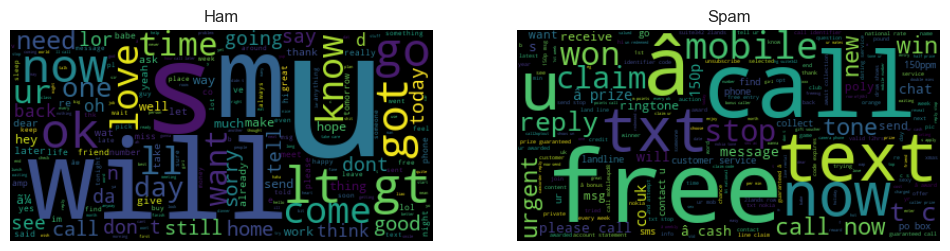

In [119]:
ham_texts_array = []

for string_list in ham_texts:
  combined_string = " ".join(string_list)
  ham_texts_array.append(combined_string)

spam_texts_array = []
for string_list in spam_texts:
  combined_string = " ".join(string_list)
  spam_texts_array.append(combined_string)
ham_wordcloud = WordCloud().generate(' '.join(ham_texts_array))
print(ham_wordcloud)
# Create a WordCloud object for the spam texts
spam_wordcloud = WordCloud().generate(' '.join(spam_texts_array))
#
# Plot the wordclouds
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(ham_wordcloud, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title('Ham')
ax[1].imshow(spam_wordcloud, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title('Spam')
plt.show()